In [1]:
#Importando todas as ferramentas que serão utiizadas no projeto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Dando upload dos dados iniciais para fazer a limpeza e a analise explanatória
df = pd.read_csv('wine_dataset.csv')

# Vizualização inicial dos dados
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'style'],
      dtype='object')

In [4]:
# Renomeando as colunas

df.rename(columns = {'fixed_acidity': 'acidez fixa',
                    'volatile_acidity': 'acidez volátil',
                    'citric_acid': 'ácido cítrico',
                    'residual_sugar': 'açúcar residual',
                    'chlorides': 'cloreto',
                    'free_sulfur_dioxide': 'dióxido de enxofre livre',
                    'total_sulfur_dioxide': 'dióxido de enxofre total',
                    'density': 'densidade',
                    'pH': 'pH',
                    'sulphates': 'sulfatos',
                    'alcohol': 'teor alcoólico',
                    'quality': 'qualidade',
                    'style': 'tipo'}, inplace = True)

In [5]:
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df.tail()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade,tipo
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [7]:
df.isnull().sum()

acidez fixa                 0
acidez volátil              0
ácido cítrico               0
açúcar residual             0
cloreto                     0
dióxido de enxofre livre    0
dióxido de enxofre total    0
densidade                   0
pH                          0
sulfatos                    0
teor alcoólico              0
qualidade                   0
tipo                        0
dtype: int64

In [8]:
df.tipo.value_counts()

tipo
white    4898
red      1599
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez fixa               6497 non-null   float64
 1   acidez volátil            6497 non-null   float64
 2   ácido cítrico             6497 non-null   float64
 3   açúcar residual           6497 non-null   float64
 4   cloreto                   6497 non-null   float64
 5   dióxido de enxofre livre  6497 non-null   float64
 6   dióxido de enxofre total  6497 non-null   float64
 7   densidade                 6497 non-null   float64
 8   pH                        6497 non-null   float64
 9   sulfatos                  6497 non-null   float64
 10  teor alcoólico            6497 non-null   float64
 11  qualidade                 6497 non-null   int64  
 12  tipo                      6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df['teor alcoólico'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: teor alcoólico, dtype: float64

In [11]:
df_separado = df.groupby('tipo')['qualidade'].mean()
df_separado

tipo
red      5.636023
white    5.877909
Name: qualidade, dtype: float64

In [12]:
df_bom = df.loc[df['qualidade'] >= 8].reset_index(drop=True)
df_bom

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade,tipo
0,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,red
1,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,red
2,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,red
3,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,red
4,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8,white
194,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8,white
195,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,white
196,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,white


In [13]:
df_bom['tipo'].value_counts()

tipo
white    180
red       18
Name: count, dtype: int64

In [14]:
df_bom['qualidade'].value_counts()

qualidade
8    193
9      5
Name: count, dtype: int64

In [15]:
fonte = {'fontname' : 'Times New Roman'}

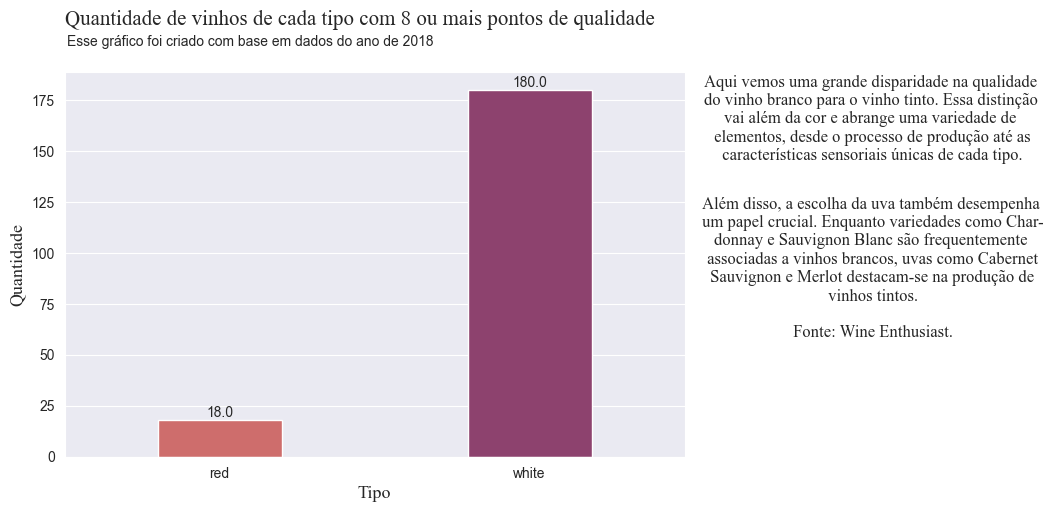

In [21]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (8, 5))
countplot = sns.countplot(data = df_bom, x = 'tipo', width = 0.4, palette = 'flare', legend=False, hue='tipo')
plt.title('Quantidade de vinhos de cada tipo com 8 ou mais pontos de qualidade', loc ='left', fontsize = 15, y = 1.1, **fonte)
plt.xlabel('Tipo', **fonte, fontsize = 13)
plt.ylabel('Quantidade', **fonte, fontsize = 13)

for p in countplot.patches:
    countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom')

plt.text(1.3, 0.76, 'Aqui vemos uma grande disparidade na qualidade\ndo vinho branco para o vinho tinto. Essa distinção\nvai além da cor e abrange uma variedade de\n elementos, desde o processo de produção até as\n características sensoriais únicas de cada tipo.',
        ha = 'center', va = 'bottom' , transform=plt.gca().transAxes, fontsize = 12, **fonte)
plt.text(0.3, 1.06, 'Esse gráfico foi criado com base em dados do ano de 2018', ha = 'center', va = 'bottom' , transform=plt.gca().transAxes, fontsize = 10)
plt.text(1.3, 0.3, 'Além disso, a escolha da uva também desempenha\n um papel crucial. Enquanto variedades como Char-\ndonnay e Sauvignon Blanc são frequentemente\n associadas a vinhos brancos, uvas como Cabernet\n Sauvignon e Merlot destacam-se na produção de\n vinhos tintos.\n\n Fonte: Wine Enthusiast.',
        ha = 'center', va = 'bottom' , transform=plt.gca().transAxes, fontsize = 12, **fonte)

#plt.savefig('grafico_vinho.png', dpi = 400, bbox_inches = 'tight') use esse código para salvar o grafico localmente

plt.show()

In [22]:
# Separando meus dados

X = df.drop('tipo', axis = 1)
y = df.tipo

In [23]:
X

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [24]:
y

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: tipo, Length: 6497, dtype: object

In [25]:
X_corr = X.corr()
X_corr

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade
acidez fixa,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
acidez volátil,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
ácido cítrico,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
açúcar residual,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
cloreto,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
dióxido de enxofre livre,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
dióxido de enxofre total,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
densidade,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulfatos,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


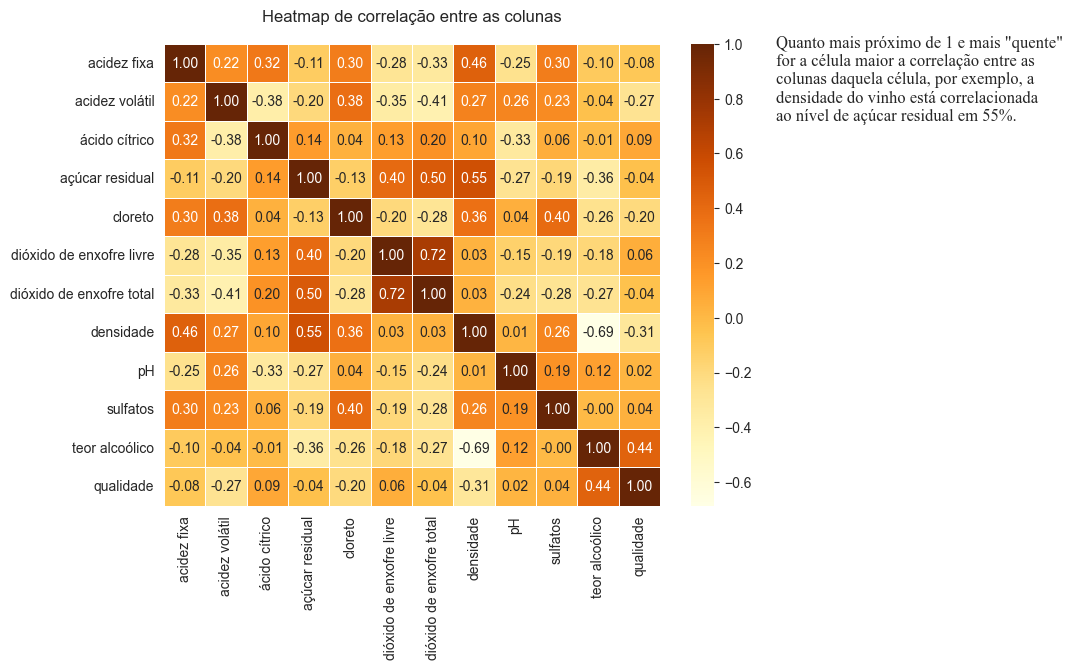

In [26]:
plt.figure(figsize= (8,6))
sns.heatmap(X_corr, annot= True, cmap='YlOrBr', fmt=".2f", linewidths= .5)
plt.title('Heatmap de correlação entre as colunas', y = 1.03)

plt.text(14.8, 2, 'Quanto mais próximo de 1 e mais "quente" \nfor a célula maior a correlação entre as \ncolunas daquela célula, por exemplo, a \ndensidade do vinho está correlacionada\nao nível de açúcar residual em 55%.', 
        fontsize = 12, **fonte)

plt.show()

In [27]:
colunas_anomalas = ['acidez fixa', 'acidez volátil', 'ácido cítrico', 'açúcar residual', 'açúcar residual', 'dióxido de enxofre livre', 'dióxido de enxofre total', 'densidade', 'pH', 'sulfatos', 'teor alcoólico', 'qualidade']

In [28]:
isolador = IsolationForest(contamination = 0.1, random_state = 42, )

In [29]:
isolador.fit(df[colunas_anomalas])

IsolationForest(contamination=0.1, random_state=42)

In [30]:
df['isolados_score'] = isolador.decision_function(df[colunas_anomalas])

In [31]:
df['isolados'] = isolador.predict(df[colunas_anomalas])

In [32]:
df

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade,tipo,isolados_score,isolados
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0.037850,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0.028798,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0.065933,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,0.045378,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0.037850,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0.118211,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0.087952,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0.097033,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0.040333,1


In [41]:
def outlier_plot(dados, metodo_outlier, x_var, y_var, xaxis_limits = [1,4], yaxis_limits = [0,1]):
    
    print(f'Método de Outlier usado: {metodo_outlier}')
    
    metodo = f'{metodo_outlier}_anomaly'
    
    print(f"Número de valores anômalos {len(dados[dados['isolados']==-1])}")
    print(f"Número de valores não anômalos {len(dados[dados['isolados'] == 1])}")
    print(f"Número total de valores na base de dados: {len(dados)}")
    
    g = sns.FacetGrid(dados, col = 'isolados', height = 4, hue = 'isolados', hue_order = [1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Método Outlier: {metodo_outlier}', y = 1.10, fontweight = 'bold')
    # g.set(xlim = xaxis_limits, ylim = yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(dados[dados['isolados'] == -1])}")
    axes[1].set_title(f"Inliers\n{len(dados[dados['isolados'] == 1])}")
    return g

Método de Outlier usado: Isolation Forest
Número de valores anômalos 650
Número de valores não anômalos 5847
Número total de valores na base de dados: 6497


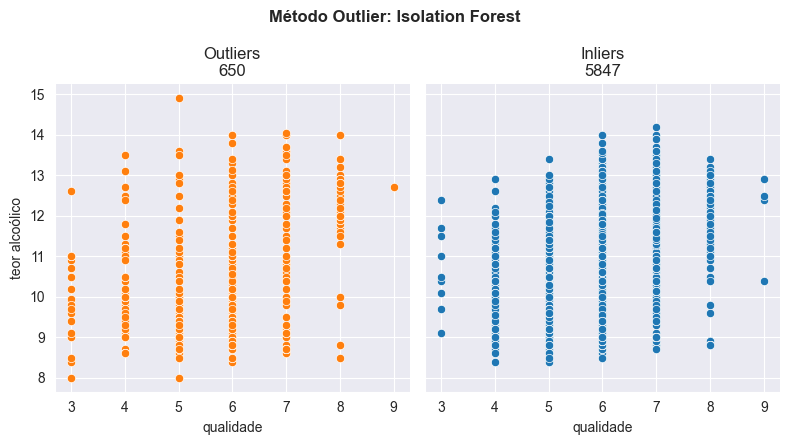

In [42]:
outlier_plot(df, "Isolation Forest", "qualidade" , "teor alcoólico", [0, 1], [0, 0.4])

In [43]:
# Criando um binarizador para meus dados objetivos

binarizador = LabelBinarizer()
y_bin = pd.DataFrame(binarizador.fit_transform(y))
y_bin

,0
0,0
1,0
2,0
3,0
4,0
...,...
6492,1
6493,1
6494,1
6495,1


In [44]:
# Criando um normalizador para meus dados a serem analisados

normalizador = MinMaxScaler()
X_norm = pd.DataFrame(normalizador.fit_transform(X), columns=X.columns)
X_norm

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667


In [45]:
y_bin.rename(columns = {0: 'tipo'})

,tipo
0,0
1,0
2,0
3,0
4,0
...,...
6492,1
6493,1
6494,1
6495,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_bin, random_state = 1, train_size = 2/3)

In [47]:
X_train

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade
5445,0.239669,0.106667,0.192771,0.128834,0.023256,0.065972,0.237327,0.106227,0.480620,0.073034,0.666667,0.500000
2375,0.371901,0.040000,0.271084,0.013804,0.049834,0.059028,0.211982,0.097166,0.232558,0.191011,0.434783,0.500000
3643,0.157025,0.203333,0.024096,0.184049,0.041528,0.072917,0.251152,0.179102,0.434109,0.230337,0.275362,0.500000
133,0.231405,0.280000,0.006024,0.013804,0.084718,0.055556,0.046083,0.155967,0.527132,0.202247,0.260870,0.500000
2084,0.198347,0.066667,0.228916,0.013804,0.031561,0.121528,0.255760,0.113553,0.581395,0.179775,0.246377,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.446281,0.333333,0.120482,0.036810,0.119601,0.048611,0.251152,0.209948,0.395349,0.207865,0.217391,0.333333
5192,0.148760,0.133333,0.168675,0.055215,0.058140,0.177083,0.350230,0.094274,0.488372,0.123596,0.391304,0.666667
3980,0.264463,0.100000,0.253012,0.069018,0.054817,0.125000,0.317972,0.155581,0.604651,0.207865,0.318841,0.500000
235,0.280992,0.366667,0.000000,0.019939,0.146179,0.045139,0.073733,0.185849,0.503876,0.202247,0.144928,0.500000


In [48]:
y_train

,0
5445,1
2375,1
3643,1
133,0
2084,1
...,...
905,0
5192,1
3980,1
235,0


In [49]:
# Criando o modelo de machine learning

modelo = RandomForestClassifier(random_state = 1)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

# Aplicando os dados no meu modelo

modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [50]:
# Pontuação do modelo = 99% de acerto

accuracy = modelo.score(X_test, y_test)
accuracy

0.9903047091412742

In [51]:
previsoes = modelo.predict(X_test)
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
acuracia_alternativa = accuracy_score(y_test, previsoes)

In [53]:
acuracia_alternativa

0.9903047091412742

In [54]:
#Prevendo novos dados

novos_dados = pd.DataFrame({
    'acidez fixa': [7.0, 6.5, 8.2],
    'acidez volátil': [0.6, 0.5, 0.7],
    'ácido cítrico': [0.25, 0.3, 0.2],
    'açúcar residual': [2.0, 1.8, 2.5],
    'cloreto': [0.08, 0.07, 0.09],
    'dióxido de enxofre livre': [15, 14, 16],
    'dióxido de enxofre total': [40, 38, 42],
    'densidade': [0.996, 0.995, 0.997],
    'pH': [3.2, 3.1, 3.3],
    'sulfatos': [0.5, 0.55, 0.48],
    'teor alcoólico': [11.5, 12.0, 11.0],
    'qualidade': [5, 6, 4]
})

In [55]:
novos_dados.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade
0,7.0,0.6,0.25,2.0,0.08,15,40,0.996,3.2,0.50,11.5,5
1,6.5,0.5,0.30,1.8,0.07,14,38,0.995,3.1,0.55,12.0,6
2,8.2,0.7,0.20,2.5,0.09,16,42,0.997,3.3,0.48,11.0,4


In [56]:
novos_norm = pd.DataFrame(normalizador.transform(novos_dados), columns=novos_dados.columns)

In [57]:
novos_norm

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloreto,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,teor alcoólico,qualidade
0,0.264463,0.346667,0.150602,0.021472,0.117940,0.048611,0.078341,0.171390,0.372093,0.157303,0.507246,0.333333
1,0.223140,0.280000,0.180723,0.018405,0.101329,0.045139,0.073733,0.152111,0.294574,0.185393,0.579710,0.500000
2,0.363636,0.413333,0.120482,0.029141,0.134551,0.052083,0.082949,0.190669,0.449612,0.146067,0.434783,0.166667


In [58]:
# Resultado das novas previsões

novas_previsoes = modelo.predict(novos_norm)
print(novas_previsoes)
print('0 = Vinho tinto\n1 = vinho branco')

[0 0 0]
0 = Vinho tinto
1 = vinho branco


In [59]:
report = classification_report(y_test, previsoes)

In [60]:
# 0 = vinho tinto
# 1 = vinho branco

In [61]:
print("Relatório de Classificação:\n", report)
print()
print(f"\nAcurácia: {accuracy * 100:.2f}%")

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       518
           1       0.99      1.00      0.99      1648

    accuracy                           0.99      2166
   macro avg       0.99      0.98      0.99      2166
weighted avg       0.99      0.99      0.99      2166



Acurácia: 99.03%
